In [1]:
pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.4 MB/s eta 0:00:00


**OPEN AI VISION ON IMAGE FROM URL**

In [5]:
from openai import OpenAI

client = OpenAI(api_key = 'API_KEY')

response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "What’s in this image?"},
        {
          "type": "image_url",
          "image_url": {
            "url": "https://i.pinimg.com/564x/55/f9/5b/55f95ba18a789a0cb747e4d770aae1fa.jpg",
          },
        },
      ],
    }
  ],
  max_tokens=200,
)

print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="The image features several dogs playing in a grassy area. One dog is holding a football in its mouth, while another dog appears to be running toward it. There's also a third dog in the background. The dogs seem to be having fun in a playful setting.", refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))


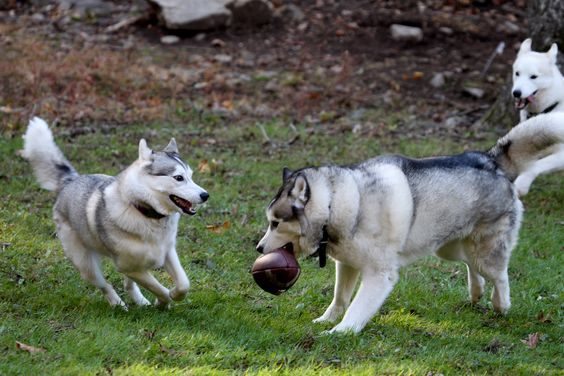

In [30]:
from IPython.display import Image
Image('https://i.pinimg.com/564x/55/f9/5b/55f95ba18a789a0cb747e4d770aae1fa.jpg')

**IMAGE DESCRIPTION**

In [17]:
response.choices[0].message.content

"The image features several dogs playing in a grassy area. One dog is holding a football in its mouth, while another dog appears to be running toward it. There's also a third dog in the background. The dogs seem to be having fun in a playful setting."

**OPEN AI VISION USING 4o-MINI USING LOCALLY SAVED IMAGE**

In [20]:
import base64
from openai import OpenAI

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

image_path = "/content/local-filename.jpg"

base64_image = encode_image(image_path)

response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What is in this image?",
        },
        {
          "type": "image_url",
          "image_url": {
            "url":  f"data:image/jpeg;base64,{base64_image}"
          },
        },
      ],
    }
  ],
)

print(response.choices[0].message.content)

The image features a cat with distinctive markings, particularly a light-colored body and darker patches on its face, ears, and tail. It has striking blue eyes and is sitting on a wooden floor, with a cozy, softly lit background. The cat's posture suggests it is alert and curious.


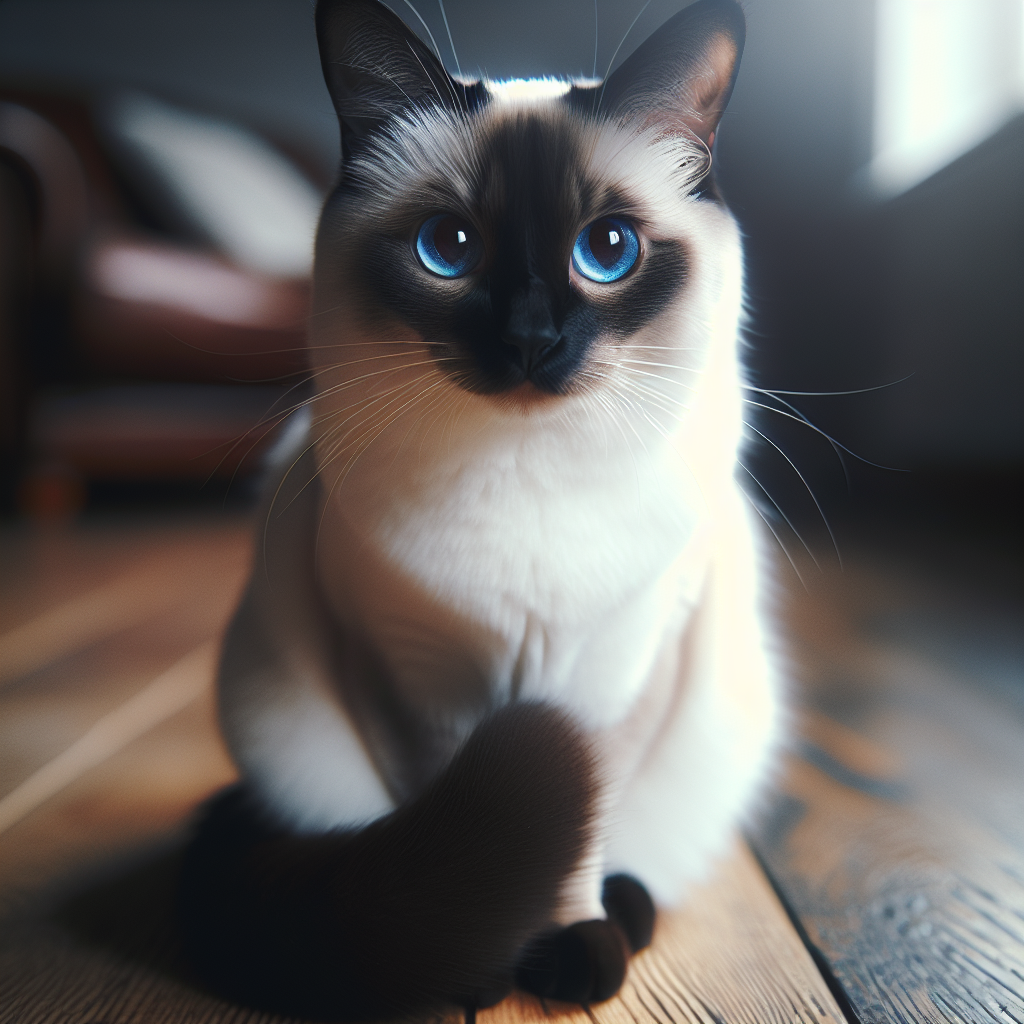

In [23]:
from IPython.display import display, Image
display(Image(filename='/content/local-filename.jpg'))

**IMAGE DESCRIPTION**

In [21]:
response.choices[0].message.content

"The image features a cat with distinctive markings, particularly a light-colored body and darker patches on its face, ears, and tail. It has striking blue eyes and is sitting on a wooden floor, with a cozy, softly lit background. The cat's posture suggests it is alert and curious."